# Assignment 3: Face Recognition using PCA

##1. Dataset Upload and Extract

### 1.1 Dataset Upload

In [1]:
# import dataset
# from google.colab import files
# uploaded = files.upload()

### 1.2 Dataset Extract

In [2]:
# !unzip att_faces_ORG.zip

### 1.3 Verify the Dataset
Verify if our datasets are correclty imported

In [3]:
# to chack the datasets are correctly uploaded and labeled.
import os
print(os.listdir(os.getcwd()))

['.config', '.ipynb_checkpoints', 'att_faces', 'att_faces_ORG.zip', 'sample_data']


## 2. Import of All Required Libraries 

In [4]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

##3. Steps For Training Dataseet

### 3.1 Generating Face Dataset
Each face image is represented in the form a matrix having m rows and n columns,
where each pixel (x,y) such that xm, and yn shows pixel location of the image as
well as the direction.
For the simplicity we are assuming each face image as a column vector, if we have p
images then the size of the face database will be mn*p.<br>
Let’s say face database is denoted as $(Face Db)_{mn*p}$*italicized text*

In [5]:
Face_db = np.zeros(shape=(400, 112*92)) # image input in p*mn format
y = np.zeros(shape=(400, 1), dtype=np.int8) # name of the corresponding image
p = 0; # increment operator to store each data
for i in range(40):
  images = os.listdir('./att_faces/s'+str(i+1)) # retrive every folder of my path
  for image in images:
    img = cv2.imread('./att_faces/s'+str(i+1)+"/"+image, cv2.IMREAD_GRAYSCALE) # read the input image
    img = np.array(img, dtype=np.float64)
    Face_db[p, :] = img.flatten() # flat the image as mentioned in document
    y[p] = i+1 # label for the input data image
    p += 1 
print(Face_db)
print(y)

[[ 60.  60.  62. ...  32.  34.  34.]
 [ 63.  53.  35. ...  41.  10.  24.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [123. 121. 126. ...  40.  35.  42.]
 [125. 124. 124. ...  36.  35.  34.]
 [125. 119. 124. ...  36.  39.  40.]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [ 9]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [12]
 [12]
 [12]
 [12]
 [12]
 [12]
 [12]
 [12]
 [12]
 [12]
 [13]
 [13]
 [13]
 [13]
 [13]
 [13]
 [13]
 [13]
 [13

###3.2 Perform Split of Data for Training and Testing Purpose
split the 80% of data for training and remaining for testing.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Face_db, y, train_size=0.8, random_state=0) # spliting by 80%
print(X_train.shape)
y_train.shape;
X_test.shape;
y_test.shape

(320, 10304)


(80, 1)

In [7]:
X_train = X_train.T # to convert data to required format i.e mn*p
X_test = X_test.T
X_test.shape

(10304, 80)

###3.3 Calculate Mean
Calculate the mean of each observation<br>
Here mean vector will have the dimension of $(M)_{mn*1}$

In [8]:
mean = np.mean(X_train, axis=1)
mean = mean.reshape(mean.shape[0], 1) # convert pre ccalculated shape of (mn,) to (mn,1)
print(mean.shape)

(10304, 1)


###3.4 Calculate Deviation Matrix
Subtract mean face from each face image, let’s say this mean zero face data as dev.

In [9]:
dev = X_train-mean
print(dev)

[[-64.425    -38.425     56.575    ...   8.575     41.575     32.575   ]
 [-67.39375  -34.39375   57.60625  ...  14.60625   41.60625   31.60625 ]
 [-62.653125 -38.653125  55.346875 ...  12.346875  41.346875  32.346875]
 ...
 [ 72.3      -12.7        1.3      ... -37.7        9.3        5.3     ]
 [ 81.50625  -15.49375    2.50625  ... -34.49375    6.50625    6.50625 ]
 [ 89.93125  -13.06875    3.93125  ... -23.06875    9.93125    5.93125 ]]


###3.5 Calculate Co-Variance of the Mean aligned faces 
Hence here will get covariance matrix of p * p dimension, which is easy to compute and process, the
idea behind computing the surrogate covariance suggested by turk and peterland that,
these are only the valid direction where we will get maximum variances, and rest of the
directions are insignificant to us. Menas these are direction where we will get the
eigenvalues and for rest we will get eigenvalues equal to zero.<br>So, take two column matrix and do vector dot prodect to get a scalar and store that in cov matrix.

In [10]:
# cov = np.zeros(shape=(320, 320))
# for i in range(320):
#   for j in range(320):
#     cov[i, j] = np.dot(dev[:, i], dev[:, j])
# print(cov)
cov = np.dot(dev.T, dev) # calculating covariance matrix by above method
                        # without using any explicit for loops
                        # shape=p*p
print(cov.shape)

(320, 320)


###3.6 Eigenvalue and Eigenvector Decomposition
Determine eigenvalue and eigenvector and  select the best direction from p directions, for this sort the eigenvalues in the
descending order.

In [11]:
lambd, V = np.linalg.eig(cov) # lambd is eigenValue and V is eigenVector
idx = np.argsort(lambd)[::-1] # get the indices in descending order according to data
lambd = lambd[idx] # sort the value
V = V[:, idx] # sort the vector
V

array([[ 0.01619146, -0.14205076, -0.04834456, ..., -0.02417078,
         0.00096708, -0.0559017 ],
       [ 0.01466334,  0.05644305,  0.07213997, ...,  0.01059905,
        -0.00629615, -0.0559017 ],
       [ 0.02594551,  0.08169512, -0.07573807, ..., -0.01891108,
         0.0264327 , -0.0559017 ],
       ...,
       [-0.06892213,  0.04050185,  0.00732537, ..., -0.01231234,
        -0.01010536, -0.0559017 ],
       [-0.06000398,  0.05717431, -0.06674366, ...,  0.02157954,
         0.05177282, -0.0559017 ],
       [-0.07397747,  0.06151273, -0.02102284, ...,  0.01594937,
        -0.01071738, -0.0559017 ]])

###3.7 Selection of Prominent Features
decide a k value, which represents the number of selected
eigenvectors to extract k direction from all p direction. On the basis of k value we can
generate the $Feature vector_{p*k}$

In [12]:
def n_components(k, V):
  # choosing n-components, k
  # V is eigenVector
  # return k prominent feature i.e our feature vector
  return V[:, :k]

In [13]:
# testing if above method works fine
feature_vec = n_components(20, V)
print(feature_vec)

[[ 0.01619146 -0.14205076 -0.04834456 ... -0.0503302  -0.0312666
  -0.04161144]
 [ 0.01466334  0.05644305  0.07213997 ...  0.01304149 -0.04017849
   0.02979382]
 [ 0.02594551  0.08169512 -0.07573807 ...  0.03671764  0.04792784
   0.09203496]
 ...
 [-0.06892213  0.04050185  0.00732537 ... -0.05274348  0.00949189
   0.08832965]
 [-0.06000398  0.05717431 -0.06674366 ... -0.03730906 -0.04283503
   0.06741606]
 [-0.07397747  0.06151273 -0.02102284 ... -0.07906485 -0.06857713
  -0.02775076]]


###3.8 Generating Eigenfaces:
For generating the eigenfaces project the each mean aligned face to the generated feature vector
**$(eigenfaces)_{k*mn}$ = $(featureVector)^{T}_{k*p}$ * $(dev)^{T}_{p*mn}$ **

In [14]:
# projecting each mean aligned face and storing of shape k*mn
def gen_eigenface(feature_vec, dev):
  # feature_vec: Feature Vector generated using n-components
  # dev: Deviation matrix
  # Return: EigenFace
  return np.dot(feature_vec.T, dev.T)

In [15]:
# testing if above method works fine
eigen_faces = gen_eigenface(feature_vec, dev) 
eigen_faces.shape

(20, 10304)

###3.9 Generating Projection of Each Train Dataset 

In [16]:
def gen_projection(eigen_faces, dev):
  # eigen_faces: Eigen Face 
  # dev: Deviation matrix
  # Return: projection of dataset
  return np.dot(eigen_faces, dev)

In [17]:
projection_train = gen_projection(eigen_faces, dev) # shape k*p
projection_train.shape

(20, 320)

##4. Steps for Testing

### 4.1 Visualize the test set

In [18]:
print(X_test)
print(X_test.shape)

[[ 41.  96.  84. ...  36.  58. 104.]
 [ 42.  94.  96. ...  36.  48. 100.]
 [ 47.  98. 101. ...  38.  47. 101.]
 ...
 [141. 131.  36. ... 210.  31.  89.]
 [156. 136.  57. ... 205.  43.  79.]
 [149. 152.  55. ... 144.  41.  77.]]
(10304, 80)


### 4.2 DEviation of test set

In [19]:
dev_test = X_test - mean # shape mn*p
print(dev_test.shape)

(10304, 80)


###4.3 Project data of test set

In [20]:
projection = gen_projection(eigen_faces, dev_test) # project each data of test dataset, shape=k*mn
print(projection.shape)

(20, 80)


###4.4 Eucledian Distance Calculation

In [21]:
def euclidean(a, b):
  return np.sqrt(np.sum(np.power((a-b), 2)))

###4.5 Check if Above implementation is correct

In [22]:
a = np.array([1, 2])
b = np.array([1, 2])
print(a);print(b)
euclidean(a, b)

[1 2]
[1 2]


0.0

###4.6 Method for calculating closest match

In [23]:
def predict(d):
  # d: projection of testing images
  minDist = np.finfo('float').max # initialize with max value
  minClass = -1 # default closest match initialized
  
  for i in range(projection_train.shape[1]):
    dist = euclidean(projection_train[:, i], d)
    if dist < minDist:
      minDist = dist
      minClass = y_train[i]
  return minClass

In [24]:
correctlyLabeled = 0
for i in range(projection.shape[1]):
  predicted = predict(projection[:, i])
  if(predicted == y_test[i]):
    correctlyLabeled += 1
  print("predicted: ", predicted, "correct: ", y_test[i])
accuracy = correctlyLabeled/projection.shape[1]
accuracy

predicted:  [14] correct:  [14]
predicted:  [31] correct:  [31]
predicted:  [35] correct:  [35]
predicted:  [20] correct:  [20]
predicted:  [25] correct:  [25]
predicted:  [7] correct:  [7]
predicted:  [16] correct:  [16]
predicted:  [27] correct:  [27]
predicted:  [15] correct:  [15]
predicted:  [22] correct:  [22]
predicted:  [35] correct:  [4]
predicted:  [14] correct:  [14]
predicted:  [12] correct:  [12]
predicted:  [40] correct:  [35]
predicted:  [2] correct:  [2]
predicted:  [6] correct:  [6]
predicted:  [30] correct:  [30]
predicted:  [15] correct:  [15]
predicted:  [21] correct:  [21]
predicted:  [20] correct:  [20]
predicted:  [18] correct:  [18]
predicted:  [27] correct:  [27]
predicted:  [13] correct:  [13]
predicted:  [15] correct:  [35]
predicted:  [18] correct:  [18]
predicted:  [2] correct:  [32]
predicted:  [8] correct:  [8]
predicted:  [2] correct:  [2]
predicted:  [29] correct:  [29]
predicted:  [11] correct:  [11]
predicted:  [18] correct:  [18]
predicted:  [31] cor

0.925

##5. Check for Different K Value

In [25]:
accuracy = []
K = []
for i in range(2, 82, 20):
  K.append(i)
K

[2, 22, 42, 62]

In [26]:
for k in K:
  feature_vec = n_components(k, V)
  # print(feature_vec.shape)
  eigenFace_train = gen_eigenface(feature_vec, dev)
  # print(eigenFace_train.shape)
  projection_train = gen_projection(eigenFace_train, dev)
  # print(projection_train.shape)
  projection_test = gen_projection(eigenFace_train, dev_test)
  # print(projection_test.shape)
  correctlMatch = 0
  for i in range(projection_test.shape[1]):
    predicted = predict(projection_test[:, i])
    if(predicted == y_test[i]):
      correctlMatch += 1
  accuracy.append(correctlMatch/projection_test.shape[1])
print(accuracy)

[0.3, 0.925, 0.925, 0.925]


## 6. Plotting Accuracy Vs K Value

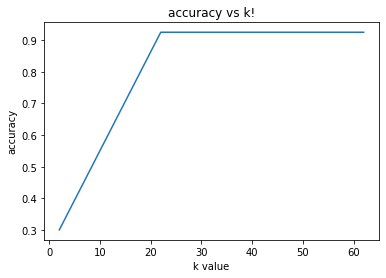

In [27]:
plt.plot(K, accuracy)
plt.xlabel('k value')
plt.ylabel('accuracy') 
plt.title('accuracy vs k!')
plt.show()